# Babyloania Transaction Data 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
raw_2017 = pd.read_excel("../data/pesanan_dibuat_1-Jan-2017_sampai_31-Dec-2017.xlsx", parse_dates=['Tanggal Pesanan','Mulai Sewa','Selesai Sewa'])
# converters={['Tanggal_Pesanan','Mulai_Sewa','Selesai_Sewa']: pd.to_datetime}
data_2017 = raw_2017.drop(columns=['Nomor', 'Nama Pelanggan', 'Alamat Pelanggan (ulangi)','Telepon', 'Alamat Kirim', 'Email', 'Lunas',
       'Total Biaya', 'Jumlah Dibayar', 'Catatan','Varian',
       'Warna', 'Status'])
data_2017 = data_2017.rename(lambda x: x.replace(' ', '_'), axis=1) #Removing spaces in column names
data_2017 = data_2017.rename(columns={'Nomor(ulang)': 'Nomor',
                                      'Nama_Pelanggan_(ulangi)': 'Nama_Pelanggan',
                                      'Pemilik_Unit,_Skema_Bagi_Hasil': 'Pemilik_Unit', 
                                      'Unnamed:_23': 'Skema_Bagi_Hasil'})


In [3]:
raw_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7642 entries, 0 to 7641
Data columns (total 24 columns):
Nomor                             3237 non-null object
Nama Pelanggan                    3237 non-null object
Telepon                           3237 non-null object
Alamat Kirim                      3237 non-null object
Email                             3232 non-null object
Lunas                             3237 non-null object
Total Biaya                       3237 non-null float64
Jumlah Dibayar                    3237 non-null float64
Catatan                           983 non-null object
Tanggal Pesanan                   7630 non-null datetime64[ns]
Nomor(ulang)                      7630 non-null object
Komponen Biaya                    7630 non-null object
Harga                             7630 non-null float64
Kode Unit                         4063 non-null object
Varian                            280 non-null object
Warna                             2338 non-null object
Mula

In [4]:
raw_2018 = pd.read_excel("../data/pesanan_dibuat_1-Jan-2018_sampai_31-Jan-2020.xlsx", parse_dates=['Tanggal Pesanan','Mulai Sewa','Selesai Sewa'])
data_2018 = raw_2018.drop(columns=['Nomor', 'Nama Pelanggan', 'Alamat Pelanggan (ulangi)','Telepon', 'Alamat Kirim', 'Email', 'Lunas',
       'Total Biaya', 'Jumlah Dibayar', 'Catatan','Varian',
       'Warna', 'Status'])
data_2018 = data_2018.rename(lambda x: x.replace(' ', '_'), axis=1) #Removing spaces in column names
data_2018 = data_2018.rename(columns={'Nomor(ulang)': 'Nomor',
                                      'Nama_Pelanggan_(ulangi)': 'Nama_Pelanggan',
                                      'Pemilik_Unit,_Skema_Bagi_Hasil': 'Pemilik_Unit', 
                                      'Unnamed:_23': 'Skema_Bagi_Hasil'})

In [256]:
#Combine data from 2 datasets
data = pd.concat([data_2017,data_2018]).reset_index(drop=True)

#Save combined data to csv
data.to_csv('combined_data.csv', index=False)

print(f"Transaksi pertama: {min(data.Tanggal_Pesanan)}")
print(f"Transaksi terakhir: {max(data.Tanggal_Pesanan)}")
print(f"Jumlah transaksi: {len(data.Nomor.unique())}")
print(f"Jumlah unit disewakan: {len(data.Kode_Unit.unique())}")

Transaksi pertama: 2017-05-12 00:00:00
Transaksi terakhir: 2020-01-24 00:00:00
Jumlah transaksi: 14949
Jumlah unit disewakan: 2134


In [2]:
# Rereading combined data from csv
data = pd.read_csv('combined_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34855 entries, 0 to 34854
Data columns (total 11 columns):
Tanggal_Pesanan     34822 non-null object
Nomor               34822 non-null object
Komponen_Biaya      34822 non-null object
Harga               34822 non-null float64
Kode_Unit           18062 non-null object
Mulai_Sewa          18062 non-null object
Selesai_Sewa        18062 non-null object
Durasi_(hari)       18062 non-null float64
Nama_Pelanggan      18062 non-null object
Pemilik_Unit        18058 non-null object
Skema_Bagi_Hasil    18019 non-null object
dtypes: float64(2), object(9)
memory usage: 2.9+ MB


In [5]:
data.dropna(subset=['Tanggal_Pesanan'], how='all', inplace=True)
data['Sewa_per_hari'] = data['Harga']/data['Durasi_(hari)']

In [9]:
#Renaming Komponen_Biaya for Sewa Gift Card

data.loc[data.Komponen_Biaya=='Sewa Giftcard dan Voucher - Giftcard','Komponen_Biaya'] = 'Giftcard dan Voucher - Giftcard'
data.loc[data.Komponen_Biaya=='Sewa Voucher  - Giftcard 1 Tahun','Komponen_Biaya'] = 'Voucher  - Giftcard 1 Tahun'
data.loc[data.Komponen_Biaya=='Sewa Babyloania - eGift Card', 'Komponen_Biaya'] = 'Babyloania - eGift Card'

data.loc[data.Komponen_Biaya=='Sewa Cuci Stroller - Stroller dan Carseat'] = 'Cuci Stroller - Stroller dan Carseat'


In [10]:
data['Item_Group'] = np.nan*len(data)

# Grouping sewa item
# data.loc[data['Komponen_Biaya'].str.startswith('Sewa'), 'Item'] = data['Komponen_Biaya'].str.partition()[2]
data.loc[data['Komponen_Biaya'].str.startswith('Sewa '), 'Item_Group'] = 'Sewa'

# Grouping Ongkir
ongkir_input = ['1 X Delivery + 2 X Pickup',
                '1 X Delivery Dan 2 X Pickup',
                '1 x delivery dan 2 x pickup',
                '1 x delivery dan 4 x pickup',
                '1 x pickup',
                '1x delivery dan 2x pickup',
                '1xdelivery + 2xpickup',
                '2 x Delivery dan pickup',
                '2 x delivery dan pickup',
                '2 x delivery+pickup',
                '2x biaya deliv + pickup',
                '2x biaya pickup',
                '2x delivery dan pickup',
                '2xDelivery + 2xpickup',
                '2xpickup', 'Biaga pickup',
                'Biaya Kirim',
                'Biaya Kirim & Jemput',
                'Biaya Kirim + Jemput',
                'Biaya Kirim + Pickup',
                'Biaya Kirim + jemput',
                'Biaya deliv',
                'Biaya deliv + 2x pickup',
                'Biaya deliv + pickul',
                'Biaya deliv + pickuo',
                'Biaya deliv + pickup',
                'Biaya deliv+pickup',
                'Biaya delivery + pickup',
                'Biaya kirim',
                'Biaya kirim & jemput',
                'Biaya kirim + jemput',
                'Biaya kirim + pickup',
                'Biaya kirim + pickup (2x pickup)',
                'Biaya pickup',
                'Delivery + Pick up',
                'Delivery + pick up',
                'Delivery + pickup',
                'Delivery dan Pickup',
                'Delivery dan pickup',
                'Delivery dan pickup disc',
                'Delivery dan pickup sudah dengan order sebelumnya',
                'Delivery+pickup',
                'Delivey + Pick up',
                'Disc delivery',
                'Disc ongkir',
                'Disc ongkir setengah',
                'Discount Ongkir',
                'Discount delivery dan pickup',
                'Diskon 1x pickup',
                'Diskon Ongkir',
                'Diskon free ongkir',
                'Diskon ongkir',
                'DISKONONGKIR',
                'FREE ONGKIR',
                'FREEDELIVERY',
                'FREEONGKIR',
                'FREEONGKIRBEKASI',
                'FREESHIPPINGBEKASI',
                'Free Delivery',
                'Free Delivery dan pickup',
                'Free Delivery dan pickup (sudah dengan order sebelumnya)',
                'Free Ongkir',
                'Free Ongkir promo gajian',
                'Free Pickup',
                'Free Shipping',
                'Free delivery',
                'Free delivery + Pick up',
                'Free ongkir',
                'Free ongkir (sudah dengan order sebelumnya)',
                'Free pickup',
                'Free shipping',
                'Free shipping bekasi',
                'Free shipping sudah dengan sewa sebelumnya',
                'Freeongkir',
                'HORE dapat free ongkir bekasi',
                'Hore Dapat Free Delivery+Pickup Senilai 99.000',
                'Hore dapat disc ongkir!!',
                'Ongkir',
                'Ongkir Setengah',
                'Ongkir setegah',
                'Ongkir setengah',
                'Ongkir setengah (delivery+pickup',
                'Ongkos Kirim',
                'Ongkos Kirim + Pick Up (2x Pick Up)',
                'Ongkos Kirim+Pick Up',
                'Ongkos kirim',
                'Ongkos kirim + pick uP',
                'Ongkos kirim + pick up',
                'Ongkos kirim + pickup',
                'Ongkos kirim+ pick up',
                'Ongkos kirim+pick up',
                'Ongkos kirim+pickup',
                'Ongkos pick up',
                'Ongkos pick up+ kirim',
                'PROMO GAJIAN : FREE DELIVERY+PICKUP 99rb',
                'PROMO GAJIAN : FREE ONGKIR!',
                'PROMOBEKASI',
                'PROMODELIVERY',
                'PROMOFREEONGKIRBEKASI',
                'PROMOFREESHIPPING',
                'PROMOONGKIRBEKASI',
                'Pick up',
                'Pickup only',
                'Promo Gajian Free Ongkir (minimal order 500rb)',
                'Promo Gajian Free Ongkir 99rb',
                'Promo free ongkir bekasi',
                'Promo free ongkir khusus bekasi',
                'Shipping',
                'baiay deliv + pickup',
                'biaay deliv + pickup',
                'biaya  pickup',
                'biaya (2x) delivery + (2x) pickup',
                'biaya + Jemput',
                'biaya 2x deliv + 2x pickup',
                'biaya 2x delivery + 2x pickup',
                'biaya deliv',
                'biaya deliv  + pickup',
                'biaya deliv (2x) + pickup (2x)',
                'biaya deliv +  pickup',
                'biaya deliv + 2x pickup',
                'biaya deliv + 2xpickup',
                'biaya deliv + Pickup',
                'biaya deliv + oickup',
                'biaya deliv + pick up',
                'biaya deliv + pickup',
                'biaya deliv + pickup (2x)',
                'biaya deliv + pickup (LUAR AREA)',
                'biaya deliv + pickup (Luar Area)',
                'biaya deliv + pickup 1',
                'biaya deliv + pickup`',
                'biaya deliv + pickupq',
                'biaya deliv +pickup',
                'biaya deliv+ pickup',
                'biaya delivery',
                'biaya delivery + (2x)pickup',
                'biaya delivery + pickup',
                'biaya delivery dan pickup',
                'biaya delliv + pickup',
                'biaya eliv + pickup',
                'biaya jemput',
                'biaya kirim +  jemput',
                'biaya kirim + jemput',
                'biaya kirim + jemputq',
                'biaya kirim + pickup',
                'biaya kirirm + jemput',
                'biaya picku[',
                'biaya pickup',
                'biays deliv + pickup',
                'biya deliv + pickup',
                'charge shipping',
                'deivery dan pickup',
                'delivery',
                'delivery + 2xpickup',
                'delivery + pick up',
                'delivery + pickup',
                'delivery 1 x dan pickup 2 x',
                'delivery 1x dan pickup 2x',
                'delivery and pickup',
                'delivery da pickup',
                'delivery dan pick up',
                'delivery dan pickup',
                'delivery dan pickup (disc)',
                'delivery dan pickup (free)',
                'delivery dan pickup bareng 181108/6/NOM',
                'delivery dan pickup dengan order 181107/34/MPT',
                'delivery dan pickup free',
                'delivery dan pickup setengah',
                'delivery dan pickup sudah dengan order sebelumnya',
                'delivery only',
                'delivery+Pickup',
                'delivery+pickup',
                'delivery+pickup sebelumnya',
                'delivey dan pickup',
                'delvery dan pickup',
                'dikirim bareng order 190227/23/OPF',
                'dikirim dengan order 190227/20/MHJ',
                'dikirim dengan order 190227/38/OPT',
                'dikirim dgn order 190225/21/XJN',
                'dikirim dgn order 190225/9/DCF',
                'dikirim dgn order 190227/18/VSN',
                'dikirim dgn order 190312/11/IFR',
                'disc delivery dan pickup',
                'disc free ongkir minimal sewa 500rb',
                'disc ongkir',
                'disc shipping',
                'discount pickup',
                'diskon biaya deliv',
                'diskon free 1x ongkir',
                'diskon free ongkir (renewal)',
                'diskon free ongkir khusus Bekasi',
                'diskon free ongkir khusus bekasi',
                'diskon ongkir',
                'diskon pick up 20%',
                'free antar',
                'free delivery',
                'free delivery (sudah dengan order sebelumnya)',
                'free delivery (sudah dgn order sebelumnya)',
                'free delivery dan pickup',
                'free delivery dan pickup (sudah dengan order sebelumnya)',
                'free delivery pickup (sudah dengan order sebelumnya)',
                'free delivery, 1xpickup',
                'free delivery, only pickup',
                'free delivery, pickup only',
                'free krn ada orderan di tgl yg sama',
                'free ongkir',
                'free ongkir (jadi satu dengan order sebelumnya)',
                'free ongkir bekasi',
                'free ongkir extend',
                'free ongkir sudah dengan order sebelumnya',
                'free shipping',
                'free shipping bekasi',
                'freedelivery',
                'freeongkir',
                'hore dapat free delivery dan pickup area bekasi',
                'kirim + pick up dgn order',
                'kirim + pick up sndr',
                'ongkir',
                'ongkir (Antar + Jemput)',
                'ongkir (antar + jemput)',
                'ongkir (antar+jemput)',
                'ongkir setengah',
                'ongkir setengah (bersama pickup order sebelumnya)',
                'ongkir setengah (pengiriman oleh customer)',
                'ongkir setengah delivery dan pickup',
                'ongkir setengan',
                'ongkir shipping',
                'ongkir sudah dengan order sebelummya',
                'ongkir sudah dengan order sebelumnya',
                'ongkir sudah dengan sewa sebelumnya',
                'ongkir tambahan',
                'ongko kirim + pick up',
                'ongkos  pick up',
                'ongkos + pick up',
                'ongkos deliv + pick up',
                'ongkos deliv + pickup',
                'ongkos deliv +pick up',
                'ongkos deliv+pick up',
                'ongkos deliv+pickup',
                'ongkos kiri + pick up',
                'ongkos kiriim + pick up',
                'ongkos kirim',
                'ongkos kirim  + pick up',
                'ongkos kirim & pickup',
                'ongkos kirim +  pick up',
                'ongkos kirim + oick up',
                'ongkos kirim + pick',
                'ongkos kirim + pick up',
                'ongkos kirim + pick up (2X,beda tgl sewa)',
                'ongkos kirim + pick up (2x kirim + pick up)',
                'ongkos kirim + pick up (2x kirim)',
                'ongkos kirim + pick up (2x pengiriman)',
                'ongkos kirim + pick up (2x pick up)',
                'ongkos kirim + pick up (2x)',
                'ongkos kirim + pickup',
                'ongkos kirim +pick up',
                'ongkos kirim +pickup',
                'ongkos kirim+ pick up',
                'ongkos kirim+pick up',
                'ongkos kirm+pick up',
                'ongkos kriim + pick up',
                'ongkos pick up',
                'ongkos pick up , dikirim dan pick up order 190213/27/UEJ',
                'ongkos pickup',
                'ongkoss deliv (pick up dengan order sblmnya)',
                'order penukaran, free ongkir',
                'pickup',
                'pickup 1x',
                'pickup Ingenuity - Baby Base 2-in-1 Booster Seat',
                'pickup only',
                'promo  gajian (free ongkir)',
                'promo diskon free ongkir',
                'promo diskon free ongkir khusus bekasi',
                'promo diskon ongkir',
                'promo diskon ongkos kirim',
                'promo free ongkir',
                'promo free ongkir Bekasi',
                'promo free ongkir bekasi',
                'promo free ongkir khusus bekasi',
                'promo free ongkos kirim',
                'promo gajiaan (free ongkir)',
                'promo gajian (free ongkir)',
                'promo gratis ongkir bekasi',
                'promo gratis ongkir khusus bekasi',
                'promo ongkir',
                'promo ongkos kirim',
                'selamat dapat disc ongkir!',
                'shipping',
                'shipping setengah',
                'shipping sudah dengan order sebelumnya',
                'sudah 1 kali ongkir',
                'tanpa ongkir',
                'voucher delivery dan pickup'
                ]
data.loc[data.Komponen_Biaya.isin(ongkir_input), 'Item_Group'] = 'Ongkir'

# Grouping Penukaran
penukaran_input = [
    'BIAYA PENUKARAN',
    'Biaya tukar',
    'Free biaya tukar',
    'biaya penukaran',
    'biaya penukaran 17 Desember 2019',
    'free penukaran',
    'free selisih penukaran',
    'free sewa (penukaran)',
    'ongkos penukaran',
    'penukaran',
    'penukaran 20 agustus',
    'tukar bumbo',
    'voucher penukaran',
]
data.loc[data.Komponen_Biaya.isin(penukaran_input), 'Item_Group'] = 'Penukaran'

# Grouping Gift Card Payment (incl. Vouchers)
giftcard_input = [
    'GC',
    'GC dari order 190204/17/WNK',
    'GIFT CARD',
    'GIFTCARD',
    'Gifcard',
    'Gifcard order 190214/8/UFH',
    'Gift Card',
    'Gift Card C9J3-KNFP-U3LM-4W4G',
    'Gift card',
    'Giftcard',
    'Giftcard 3238 Df4 A 6 Hc9 G23 A',
    'Giftcard 548rb',
    'Giftcard Okt 2016',
    'Giftcard sewa nuna mixx',
    'Giftcard voucher',
    'Giftcard dan Voucher - Giftcard',
    'Kode Giftcard : FORFANYMETIAF',
    'Last Giftcard',
    'Refund Gift Card',
    'VOUCHER + REFUND',
    'Voucher',
    'Voucher 30rb',
    'Voucher ForGina',
    'Voucher VIE1824529',
    'gift card',
    'gift card - SORRYKENIA',
    'gift voucher',
    'giftcard',
    'giftcard 1 jt',
    'refund gift card',
    'sisa dari GC 1 juta',
    'voucher',
    'voucher dari sewa cotonnier moses',
    'voucher jumperoo',
    'voucher junior bassinet',
    'voucher sisa sewa rotho',
    'Voucher  - Giftcard 1 Tahun'
    'Babyloania - eGift Card'

]
data.loc[data.Komponen_Biaya.isin(giftcard_input), 'Item_Group'] = 'Gift_card'

# Grouping Others
others_input = [
    '-',
    'BIAYA GANTI RUGI BOLA',
    'Charge sewa 5 hari',
    'Cuci Stroller - Stroller dan Carseat',    
    'Biaya selisih harga lama',
    'REFUND (KELEBIHAN TRF)',
    'kelebihan transfer',
    'pembayaran order sblmnya',
    'pengganti titip sewa',
    'pengurangan harga sewa lama',
    'potongan harga lama',
    'sudah dibayar di order bednest',
    'upgrade (order pengganti)',
    'yg sudah dibayar cust',
    'yg sudah dibayar customer'
]
data.loc[data.Komponen_Biaya.isin(others_input), 'Item_Group'] = 'Others'

# Grouping Discounts (the rest)
data.loc[data.Item_Group.isnull(), 'Item_Group'] = 'Discount'


,Tanggal_Pesanan,Nomor,Komponen_Biaya,Harga,Kode_Unit,Mulai_Sewa,Selesai_Sewa,Durasi_(hari),Nama_Pelanggan,Pemilik_Unit,Skema_Bagi_Hasil,Sewa_per_hari,Item_Group
34835,2020-01-23,200123/20/BCK,Sewa Foldaway - Bumper Standard Mat,470000,FOLDAWAYBUMPERSTANDARD-HHD-2301,2020-01-28,2020-02-27,30,Adila Gani,HDII HDII,B: 65% * pendapatan,15666.7,Sewa
34836,2020-01-23,200123/20/BCK,delivery+pickup,99000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ongkir
34837,2020-01-23,200123/21/QXH,Sewa Little Tikes - Cozy Coupe Push Car,148000,DWG1,2020-01-31,2020-03-01,30,Anissya Pramesti,Dwi Gracesantia,J: 45% * pendapatan,4933.33,Sewa
34838,2020-01-23,200123/21/QXH,delivery+pickup,99000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ongkir
34839,2020-01-23,200123/23/SAX,Sewa Babyzen - Yoyo+ Ride Along Board,907000,BABYZENYOYO+BOARD-HHD-1937,2020-01-31,2020-03-01,30,Adisti Daniaputri,HDII HDII,B: 65% * pendapatan,30233.3,Sewa
34840,2020-01-23,200123/23/SAX,Sewa Chicco - Next2Me Dream,585000,CHICCONEXTDREAM-HHD-2240,2020-01-31,2020-03-01,30,Adisti Daniaputri,HDII HDII,B: 65% * pendapatan,19500,Sewa
34841,2020-01-23,200123/23/SAX,Sewa Rotho - Babydesign Top Bathtub with Newbo...,309000,HDII575,2020-01-31,2020-03-01,30,Adisti Daniaputri,HDII HDII,HDII: 55% * pendapatan,10300,Sewa
34842,2020-01-23,200123/23/SAX,Sewa Doona - The Next Generation Car Seat,619000,STS-10-19-0011,2020-01-31,2020-03-01,30,Adisti Daniaputri,HDII HDII,HDII: 55% * pendapatan,20633.3,Sewa
34843,2020-01-23,200123/23/SAX,FREESEWA BABY BATH,-309000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Discount
34844,2020-01-23,200123/23/SAX,biaya deliv + pickup,99000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ongkir


In [11]:
data.Item_Group.value_counts()

Sewa         18057
Ongkir       13719
Discount      2841
Gift_card      163
Others          22
Penukaran       20
Name: Item_Group, dtype: int64

In [12]:
# Teasing out rented item
data.loc[data.Item_Group=='Sewa','Sewa_Item'] = data['Komponen_Biaya'].str.partition()[2]

In [14]:
#Setting up a new column
data['Item_Category'] = np.nan*len(data)

In [15]:
# Grouping Strollers 
# including stroller adaptors / accessories

stroller_list = [
    'Aprica - Karoon',
    'Aprica - Magical Air S',
    'Baby Elle - Carseat BE 500',
    'Baby Elle - Citilite 2',
    'Baby Elle - Cozy',
    'Baby Elle - Duo Evogue',
    'Baby Elle - S330 Revo',
    'Baby Elle - Trevi Twin S-2500',
    'Baby Jogger - City Mini Stroller',
    'Baby Jogger - City Select Twin',
    'Baby Jogger - City Tour',
    'Babydoes - 415 Skyline Stroller',
    'Babystyle - Hybrid Cabi Stroller',
    'Babystyle - Oyster 2',
    'Babystyle - Oyster 2 Humbug Limited Edition',
    'Babystyle - Oyzter Zero',
    'Babyzen  - Yoyo +6+  - Stroller',
    'Babyzen - Adaptor For Maxi-Cosi Babyzen Yoyo+',
    'Babyzen - Yoyo 0+ (Seat Only)',
    'Babyzen - Yoyo 6+',
    'Babyzen - Yoyo+ 0+',
    'Babyzen - Yoyo+ 6+',
    'Babyzen - Yoyo+ Footmuff',
    'Babyzen - Yoyo+ Ride Along Board',
    'Bugaboo - Adaptor For Maxi-Cosi Bee',
    'Bugaboo - Bee 3 Bassinet + Adaptor',
    'Bugaboo - Bee 5',
    'Bugaboo - Bee 5 Bassinet with Base & Adaptor',
    'Bugaboo - Bee Plus',
    'Bugaboo - Bee3',
    'Bugaboo - Bee3 Limited Edition',
    'Bugaboo - Bugaboo Comfort Wheeled Board with Seat + Adaptor (for Bugaboo Bee 5 ONLY)',
    'Bugaboo - Comfort Transport Bag',
    'Bugaboo - Comfort Wheeled Board with Seat + Adaptor',
    'Bugaboo - Compact Transport Bag',
    'Bugaboo - Footmuff',
    'Chicco - Liteway Stroller',
    'Cocolatte  - Otto Pali',
    'Cocolatte  - Quantum',
    'Cocolatte - CL 550 Twin',
    'Cocolatte - Pendio',
    'Cocolatte - Pockit 2',
    'Cocolatte - Pockit CL788',
    'Cocolatte - Pockit CL838',
    'Cocolatte - Safee CS810',
    'Cocolatte - T80AN Mist',
    'Cocolatte - Trip CL 904',
    'Cocolatte - Trip R CL908',
    'Cocolatte - iSport',
    'Combi - F2 Plus Stroller',
    'Combi - Urban Walker',
    'Cosatto - Shuffle Tandem',
    'Cuci Stroller - Stroller dan Carseat',
    'Easy Walker - Mini Stroller',
    'Einhill - Armadillo 1',
    'Einhill - Armadillo 2',
    'Elle - Delray Classic LDR16',
    'Elle - Gogo',
    'GoodBaby - A2009H',
    'GoodBaby - GB Buggy Qbit+',
    'GoodBaby - Pockit+',
    'Graco - Evo Mini',
    'Graco - Signature Series Stroller',
    'Greentom - Upp Classic',
    'Jette Kinderwagen - Jasper',
    'Joie - Aire Twin Stroller',
    'Joie - Chrome',
    'Joie - Dreamer',
    'Joie - Evalite Duo',
    'Joie - Extoura Travel System',
    'Joie - Meet Float',
    'Joie - Mirus',
    'Joovy - Big Caboose Twin Stroller',
    'Joovy - Caboose Ultralight with Extra Seat Stroller',
    'Keenz - Air Plus',
    'Lascal - Buggyboard Maxi',
    'Maclaren - Quest Sport',
    'Maclaren - Triumph',
    'Maclaren - Twin Triumph',
    'Maclaren - XT',
    'Mamas Papas - Acro',
    'Mamas Papas - Adaptor for Maxi Cosi Mamas Papas Sola/Urbo',
    'Mamas Papas - Armadillo',
    'Mamas Papas - Armadillo Flip',
    'Mamas Papas - Sola',
    'Mamas Papas - Sola 2',
    'Mamas Papas - Urbo 2',
    'Mamas Papas - Urbo 2 - Rose Gold Limited Edition',
    'Manito - Elegance Alpha Stroller Weather Shield',
    'Micralite - Superlite',
    'Mima - Xari Stroller',
    'Nuna - Ivvi',
    'Nuna - Ivvi Carry Cot + Stand',
    'Nuna - Mixx',
    'Nuna - Pepp',
    'Orbit Baby - G2',
    'Pali - Sei.9',
    'Peg Perego - Pliko P3',
    'Pliko - Milano 365',
    'Quinny - Buzz 2012',
    'Quinny - Moodd',
    'Recaro - Easylife Stroller',
    'Silver Cross - Micro',
    'Silver Cross - Reflex + Baby Cot',
    'Silver Cross - Surf',
    'Stokke - Xplory V2',
    'Stokke - Xplory V3',
    'Stokke - Xplory V4 & Carrycot',
]

data.loc[data.Sewa_Item.isin(stroller_list), 'Item_Category'] = 'Stroller'

In [16]:
# Grouping cribs
# cribs include sleepers, bassinets, playards
crib_list = [
    'Baby Delight - Snuggle Nest',
    'BabyMinds - Elle Crib with Drawer + Baby Bee Mattress',
    'Babydoes - 1740 Bravada',
    'Babymoov - Bibed',
    'Babymoov - Cosymat',
    'Bed Box - Baby Bed Box',
    'Bednest - Bedside Crib',
    'Brevi - PlayPen',
    'Chicco - Next2Me Dream',
    'Chicco - Next2Me Side Sleeping Crib',
    'Cocoonababy - Cocoonababy',
    'Cotonnier - Cocotier Small Crib',
    'Cotonnier - Moses Basket',
    'Cotonnier - New Citronnier Small Crib',
    'Cotonnier - Palmier Small Crib',
    'Dr. Bebe - Foldable Bumper Bed',
    'Evenflo - Villi Travel Crib',
    "Fisher-Price - Green Rock 'n Play Portable Bassinet",
    'Fisher-Price - On-The-Go Baby Dome',
    "Graco - Graco Pack 'n Play Silhouette Playard",
    'Graco - Pack & Play Playard',
    'Graco - Pack & Play Playard with Cuddle Cove Rocking Seat',
    "Graco - Pack 'n Play Playard with Newborn Napper Station",
    'Graco - Pack n Play with Reversible Napper & Changer',
    'Graco - Suite Solution Pack & Play Playard',
    'HALO - Bassinet Swivel Sleeper',
    'Ingenuity - Washable Playard',
    'Ingenuity - Washable Playard with Dream Centre',
    'Jarrons - Happy Sleep 5 in 1 Convertible Baby Cot',
    'Joie - Excursion Change and Rock Travel Cot',
    'Joie - Illusion Travel Cot',
    'Junior - Baby Bassinet 720A',
    'Maali - Bed',
    'Maali - Mylo Bed',
    'Mothercare - Roll Up Moses Basket (tanpa stand)',
    'Mothercare - Roll Up Moses Basket with Stand',
    'Mothercare - Swinging Crib',
    'Nuna - Sena',
    'Summer Infant - By Your Side Sleeper',
    'SwaddleMe - By Your Side Sleeper',
    'The First Years - Close And Secure Sleeper',
    'Tutti Bambini - Cozee Bedside Crib',
]

data.loc[data.Sewa_Item.isin(crib_list), 'Item_Category'] = 'Crib'

In [17]:
# Grouping Car Seats

car_seat_list = [
    'Ailebebe - Car Seat Kurutto NT2',
    'Babydoes - CH875 Car Seat',
    'Brevi - Silverline Car Seat',
    'Britax - B-Safe Infant Car Seat',
    'Britax - Romer Evolva 1-2-3 Plus',
    'Britax - Roundabout Convertible Car Seat',
    'Cam - Il Mondo Del Bambino Area Zero+ Car Seat',
    'Care Baby  - Massimo Toddler Car Seat',
    'Cocolatte - CL858 Car Seat',
    'Cocolatte - CS888E Car Seat',
    'Cocolatte - Carseat Omni Guard',
    'Combi - Coccoro S',
    'Doona - The Next Generation Car Seat',
    'Evenflo - Chase LX Harnessed Booster Car Seat',
    'Ferrari - Beline Car Seat',
    'Ferrari - Cosmo Convertible Car Seat',
    'Graco - 4Ever All In 1',
    'Graco - Junior Baby Car Seat 0+',
    'Graco - MyRide65 Car Seat',
    'Joie - Every Stages Car Seat',
    'Joie - Gemm Car Seat',
    'Joie - Gemm Car Seat + Base',
    'Joie - Meet Tilt Car Seat',
    'Joie - Steadi Car Seat',
    'Joie Signature - I-Gemm Infant Car Seat',
    'Maxi Cosi - Mico AP With Base',
    'Maxi-Cosi - Axiss Car Seat',
    'Maxi-Cosi - CabrioFix Car Seat',
    'Maxi-Cosi - Opal',
    'Maxi-Cosi - Pebble Car Seat',
    'Maxi-Cosi - Pria 70',
    'Maxi-Cosi - Vello 65',
    'Mothercare - Advance XP Highback Booster Car Seat',
    'Mothercare - Car Seat Advance SP',
    'Mothercare - Madrid Combination Car Seat',
    'Nuna - Pipa Car Seat',
    'Nuna - Pipa Car Seat + Base',
    'Nuna - Pipa Icon',
    'Nuna - Pipa Isofix Base',
    'Nuna - Rava Car Seat',
    'Orbit Baby - G3 Toddler Car Seat',
    'Peg Perego - Primo Viaggio 4-35 Car Seat',
    'Peg Perego - Primo Viaggio Convertible Car Seat',
    'Peg Perego - Primo Viaggio SL Infant Car Seat',
    'Peg Perego - Viaggio 0+1 Switchable Car Seat',
    'Recaro - Performance Ride Vibe Toddler Car Seat',
    'Recaro - Young Sport',
    'Silver Cross - Simplicity Infant Carrier',
    'Sparco - Italy F1000K',
    'Stokke - Multi Car Seat Adaptor',
    'Stokke - iZi-Go by BeSafe Baby Car Seat',
]

data.loc[data.Sewa_Item.isin(car_seat_list), 'Item_Category'] = 'Car_Seat'

In [18]:
# Grouping Rockers 

rocker_list = [
    '4Moms - Bounceroo',
    '4Moms - Mamaroo',
    '4Moms - Mamaroo 2016',
    '4Moms - Origami Bassinet',
    'Bright Starts - Portable Swing',
    'Bright Starts - Roaming Safari Portable Swing',
    'Combi - Fealetto Auto Swing',
    'Comfort & Harmony - Cradling Rocker',
    'Fisher-Price - Brentwood Baby Swing',
    "Fisher-Price - Cradle 'n Swing",
    'Fisher-Price - Infant To Toddler Rocker',
    "Fisher-Price - Newborn Rock 'n Play Sleeper",
    'Fisher-Price - Newborn-to-Toddler Portable Rocker',
    'Fisher-Price - Rainforest Friends Newborn to Toddler Portable Rocker',
    'Graco - Move with Me',
    'Graco - Swing Lovin Hug With Plug',
    'Iimo - Rocking Chair',
    'Ingenuity - ConvertMe Swing-2-Seat',
    'Ingenuity - Moonlight Rocking Sleeper',
    'Ingenuity - Rock & Relax Elevated Rocker Deluxe',
    'Ingenuity - Soothe ‘n Delight Portable Swing',
    'Joie - Serina 2in1 Swing and Rocker',
    'Mamalove - Baby Swing',
    'Mastela - Deluxe Portable Swing',
    'Mothercare - Loved So Much Bouncer',
    'Mothercare - Norwegian Wood Bouncer',
    'Mothercare - Owl 2-in-1 Rocker & Bouncer',
    'Nuna - Leaf',
    'Nuna - Leaf Curv',
    'Nuna - Leaf Curv with Toy Bar',
    'Nuna - Leaf Grow',
    'Stokke - Steps™ Bouncer\u200b',
    'Sugar Baby - 10-in-1 Premium Rocker',
    'Tiny Love - 3in1 Rocker Napper',
    'Weeler - Moonlight Rocking Sleeper Deluxe 6635',
    'Weeler - Portable Swing 6194',
    'Fisher-Price - Lil Laugh and Learn Swing',
]

data.loc[data.Sewa_Item.isin(rocker_list), 'Item_Category'] = 'Rocker'

In [19]:
#Grouping slings, carriers
carrier_list = [
    'Aprica - Pitta 4 Way Baby Carrier',
    'Baba Slings - Classic',
    'Baba Slings - Lite',
    "Baby K'Tan - Original Denim",
    "Baby K'tan - Breeze",
    'Beco - Gemini',
    'Boba - Carrier 3G',
    'Boba - Carrier 4G',
    'Cybex - Yema Click Baby Carrier',
    'Deuter - Kid Comfort II Carrier',
    'Deuter - Kid Comfort III Carrier',
    'Ergobaby - 360 Carrier',
    'Ergobaby - 360 Carrier (2017)',
    'Ergobaby - Adapt Carrier',
    'Ergobaby - Hip Seat Carrier',
    'Ergobaby - Infant Insert',
    'Ergobaby - Organic Baby Carrier',
    'Ergobaby - Original',
    'Hippychick - Hipseat',
    'I-Angel - Hello Hipseat Carrier',
    'I-Angel - Hipseat Carrier',
    'I-Angel - Miracle Hipseat Carrier',
    'I-Angel - Rainbow 2 Hipseat Carrier',
    'LittleLife - Explorer S2 Carrier',
    'Minimonkey - Twin Carrier',
    'Pognae - ORGA+ 100% All In One Organic Hipseat Carrier',
    'Pognae - Orga Organic Hipseat Carrier',
    'Pognae - no.5 Waterproof Outdoor Hipseat Carrier',
    'Stokke - MyCarrier Cool',
    'Tula - Toddler Carrier',
    'We Made Me - Pao Papoose Baby Carrier',
    'We Made Me - Soohu SlingTM Classic Organic',
]

data.loc[data.Sewa_Item.isin(carrier_list), 'Item_Category'] = 'Carrier'

In [20]:
# Grouping Toys

toys_list = [
    'Atticlab Design  - Yellow on White Small Set',
    'Atticlab Design - All White Medium Set',
    'Atticlab Design - Natural Small Set',
    'Atticlab Design - Retro Set',
    'Atticlab Design - Yellow on Brown Small Set',
    'Atticlab Design - Yellow on White Medium Set',
    'B Kids - Giraffe Fun Station',
    'Beezy Board - 20 x 30 cm',
    'Beezy Board - Coba Sebelum Membeli : Double Side 45 x 60cm',
    'Beezy Board - Double Side 30 x 45cm',
    'Beezy Board - Double Side 45 x 60cm',
    'Beezy Board - Mini (20 x 15cm)',
    'Bundle - Bambinio Activity Toys 1(Bright Starts Explore & Roar Jumper + ELC Lights and Sounds Buggy Driver)',
    'Bundle - Bambinio Activity Toys 2 (Fisher Price Lion Musical Walker + Vtech Sit To Stand Alphabet Train)',
    'Bundle - Bundle of Toys 1 : Fisher Price Walker To Wagon + LeapFrog Roll and Go Rocking Horse',
    'Bundle - Bundle of Toys 10 : ELC Light and Sound Drum + Fisher Price Brilliant Basics Little Super Star Classical Stacker',
    'Bundle - Bundle of Toys 11 : Vtech Baby’s First Storytime Rhymes + Fisher Price Laugh & Learn Smart Stages Vacuum + Vtech Crawl and Learn Bright Lights Ball',
    'Bundle - Bundle of Toys 12: LeapFrog Roll and Go Rocking Horse + ELC Highchair Steering Wheel + Fisher Price Musical Lion Walker',
    'Bundle - Bundle of Toys 3 (Fisher Price Laugh & Learn Puppy’s Activity Home + Fisher Price Laugh and Learn Smart Stages Vacuum)',
    'Bundle - Bundle of Toys 5 (ELC Light and Sound Radio + ELC Light and Sound Activity Cash Register)',
    'Bundle - Bundle of Toys 7 : ELC Alphabet Teaching Frame & ELC Abacus Teaching Frame',
    'Bundle - Bundle of Toys 8 (Fisher-Price® Bright Beats Activity Center + Fisher Price Peek - A - Boo Cuckoo)',
    'Bundle - Bundle of Toys: ELC Sing Star Microphone & ELC Fun-Key Guitar',
    'Bundle - Bundle of Toys: LeapFrog Roll and Go Rocking Horse & Fisher Price Peek-a-Boo Toaster',
    'Bundle - Kids Athletic',
    'Bundle - Newborn Outfit for Photography',
    'Bundle - of Toys 2 (Fisher Price Laugh & Learn Smart Stages Laptop + Fisher Price Infant Tappin’ Beats Bench)',
    'Bundle - of Toys 4 (ELC Tabletop Art Center + ELC Alphabet Teaching Frame)',
    'Bundle - of Toys 6 (Vtech Animal Nursery Rhymes + ELC Stacking Rings + Fisher Price Laugh and Learn Medical Kit)',
    'Bundle - of Toys : ELC Little Learning Phone, ELC My First Torch, Fisher Price Laugh & Learn Smart Stages Tablet, Fisher Price Pull Along Turtle',
    'Bundle - of Toys : Fisher Price Laugh & Learn Learning Keys, Fisher Price Laugh & Learn Learning Happy Apple & Leapfrog Learn & Groove : Color Play Drum',
    'Bundle - of Toys : Fisher Price Laugh & Learn Sing & learn Music Player, Fisher Price Laugh & Learn Click n Learn Camera Toy & Fisher Price Laugh & Learn Storybook Rhymes',
    'Bundle - of Toys: ELC Light and Sound Buggy Driver & ELC Singing Animal Keyboard',
    'Bundle - of toys 9 : Fisher Price Musical Lion Walker & Fisher Price Pop N Push Elephant',
    'ELC - Carry Along Keyboard',
    'ELC - Cleaning Trolley',
    'ELC - Cupcake My First Pram',
    'ELC - Cupcake Nursery Center',
    'ELC - Double Sided Wooden Easel',
    'ELC - Drop and Pop Giraffe',
    'ELC - Fairy Palace Pop Up Tent',
    'ELC - Giant Activity Cube',
    'ELC - Giant Wooden Activity Cube',
    'ELC - Key Boom Board Piano',
    "ELC - LIttle Cook's Kitchen",
    'ELC - Lights and Sound Activity Table',
    'ELC - Lights and Sounds Buggy Driver',
    'ELC - Musical Activity Station',
    'ELC - Musical Footsteps',
    'ELC - My Magnetic Pattern Board',
    'ELC - Retro Diner Kitchen',
    'ELC - Sand and Water Table',
    'ELC - Sensory Dome',
    'Fisher-Price - Cookie Shape Surprise',
    'Fisher-Price - Laugh & Learn Rainforest Friends Deluxe Musical Mobile',
    'Fisher-Price - Learning Toolbench',
    'Fisher-Price - Light and Sounds Activity Table',
    'Fisher-Price - Precious Planet 2-in-1 Projection Mobile',
    'Injusa - Disney Frozen Forest Playhouse',
    'Kiddy Star - Building Blocks - 30 pieces',
    'LeapFrog - Animal Adventure Learning Table',
    'LeapFrog - Learn and Groove Musical Table',
    'LeapFrog - My Discovery House',
    'Little Tikes - Cook n Grow Kitchen',
    'Little Tikes - Cook n Store™ Kitchen',
    "Little Tikes - Picnic n' Playhouse",
    'Little Tikes - Sand & Sea Play Table',
    'Little Tikes - Super Chef Kitchen™',
    'Magna-Tiles - CLEAR 48 Piece Set',
    'Melissa & Doug - 4-in-1 Melissa & Doug Sound Puzzles and Latches Board',
    'Melissa & Doug - 5-in-1 Melissa & Doug Sound Puzzles and Latches Board',
    'Playgo - Fun Wheels Water Activity',
    'Step2 - Barbie Fantasy Vanity',
    'Tegu - Magnetic Wooden Blocks Classics 14-Pieces Set',
    'VTech - Little Friendlies 3 in 1 Baby Centre',
    'VTech - Winnie the Pooh Explore and Learn Table',
    'Weplay - Q-Blocks 16 pieces',
    'IKEA - Duktig Play Kitchen',
    'Magformers - 30 Pieces Set'
]

data.loc[data.Sewa_Item.isin(toys_list), 'Item_Category'] = 'Toy'

In [21]:
# Grouping books 

books_list = [
    'Pustakalana - Bag of Books A-B-C',
    'Pustakalana - Bag of Books D-E-F',
    'Pustakalana - Bag of Books G-H-I-J',
    'Rabbit Hole - Paket Buku Bayi',
    'Rabbit Hole - Rabbit Hole Buku Pra Sekolah - Bahasa Inggris',
    'Rabbit Hole - Rabbit Hole Paket Buku Bayi - Bahasa Inggris'
]

data.loc[data.Sewa_Item.isin(books_list), 'Item_Category'] = 'Book'

In [22]:
# Grouping Activities

activities_list = [
    'Baby Einstein - 2-in-1 Lights & Sea Activity Gym & Saucer',
    'Baby Einstein - Activity Jumper',
    "Baby Einstein - Neptune's Ocean Discovery Jumper",
    "Baby Einstein - Sewa Perdana: Baby Einstein Neptune's Ocean Discovery Jumper",
    'Begun - Balance Beam',
    'Begun - Pikler Triangle',
    'Boulder - Round Trampoline with Safety Net',
    'Bright Starts - 2-in-1 ConvertMe Activity Table & Gym',
    'Bright Starts - Around We Go',
    'Bright Starts - Bounce Bounce Baby Einstein Edition',
    'Bright Starts - Bounce-a-bout',
    'Bright Starts - Explore & Roar Jumper',
    'Bright Starts - Finding Nemo Sea Of Activities Jumper',
    'Bright Starts - Having a Ball Get Rollin Activity Table',
    'Bright Starts - Learn & Giggle Activity Station',
    'Bright Starts - Light Up Lagoon Activity Gym',
    'Bright Starts - Pop & Roll Roadster',
    'Bright Starts - Sewa Perdana: Bright Starts Around We Go',
    'Bright Starts - Smiling Safari Jumper',
    'Ching Ching - Rabbit Slide, Ladybug Swing & Basketball (SL08)',
    'Coby Haus - Lolly Gummy Rocking Cattle',
    'Coby Haus - Lolly Gummy Rocking Chair',
    'Coby Haus - Lolly Gummy Slides',
    'ELC - Baby Active Trampoline',
    'ELC - Blossom Farm Woolly Lamb Rocker',
    'ELC - Hexagon Ball Pit (+30 bola)',
    'ELC - Indoor Giraffe Trampoline',
    'ELC - Junior Trampoline',
    'ELC - Sensory Ball Pit',
    "ELC - Sit 'n' Bounce",
    'Eduplay - Rocking Horse',
    'Eduplay - Slide',
    'Evenflo - ExerSaucer Triple Fun',
    'Evenflo - Exersaucer SmartSteps ABC',
    'Evenflo - Exersaucer SmartSteps Walk Around',
    'Fisher-Price - Animal Krackers Jumperoo',
    'Fisher-Price - Baby Gift Rainforest Play Gym',
    'Fisher-Price - Bright Beats Activity Center',
    'Fisher-Price - Deluxe Kick & Play Piano Gym',
    'Fisher-Price - First Steps Jumperoo',
    'Fisher-Price - Go Wild Jumperoo Activity Centers',
    'Fisher-Price - Kick & Play Piano Gym',
    "Fisher-Price - Laugh & Learn Puppy's Plane Ride",
    'Fisher-Price - Laugh and Learn Jumperoo',
    "Fisher-Price - Little Superstar Step N' Play Piano",
    'Fisher-Price - Luv U Zoo Jumperoo',
    'Fisher-Price - Newborn Grow With Me Gym',
    'Fisher-Price - Ocean Wonders Jumperoo',
    'Fisher-Price - Precious Planet Deluxe Activity Gym',
    'Fisher-Price - Precious Planet Khaki Sands Jumperoo',
    'Fisher-Price - Rainforest Friends Musical Activity Gym',
    'Fisher-Price - Rainforest Friends Space Saver Jumperoo',
    'Fisher-Price - Rainforest Jumperoo',
    'Grow ‘n Up - 2-in-1 Slide to Rocker',
    'Grow ‘n Up - 6 in 1 Slide & Sport Station',
    'Grow ‘n Up - First Steps Scramble N Slide Set',
    'Grow ‘n Up - Qwikfold Fun Slide',
    'Grow ‘n Up - Qwikfold Maxi Slide',
    "Grow ‘n Up - Scramble 'N Slide Play Center",
    'Intex - Lazy Fish Baby Shade Pool',
    'Kids - Slide and Swing 4 in 1',
    "L'abeille - 3in1 Bunny Play & Grow Activity (KC-526 C)",
    "L'abeille - Dream House with Elephant Slide (KC-881 TC+512)",
    "L'abeille - Froggy 2in1 Slide & Rocker (KC-501)",
    "L'abeille - Rocking Horse (KC-008)",
    'Little Tikes - 5-in-1 Adjustable Gym',
    'Little Tikes - Activity Garden Treehouse',
    'Little Tikes - Activity GardenTM',
    'Little Tikes - Easy Store Large Play Slide',
    'Little Tikes - LT Rocking Horse',
    'Little Tikes - Musical Ocean 3-in-1 Gym',
    'Little Tikes - Trampoline LT',
    'Oball - Bounce-O-Bunch Activity Center™',
    'Parklon - Slide',
    'Parklon - Slide 3 in 1',
    'Parklon - Slide 5 in 1',
    'Plum - Junior Trampoline and Enclosure 4.5ft',
    'Plum - Junior Trampoline and Enclosure 6ft',
    'Soleil - Trampoline',
    'Step2 - All-Star Sports Climber',
    'Step2 - Kangaroo Climber',
    'Tobebe - Big Happy Playhouse Without Slide',
    'Tobebe - Big Happy Playhouse with Slide',
    'Weplay - Rocking Bowl',
    'Weplay - Whally Board',
    'Yobee - Portable Soccer Gate',
    'Happy Hop - Adventure Combo Jumping Castle',
]

data.loc[data.Sewa_Item.isin(activities_list), 'Item_Category'] = 'Activity'

In [23]:
# Grouping Play_area, includes walker, playmats, playhouse, fence (on the floor)
play_area = [
    '3DuPlay - Playmat Large',
    '3DuPlay - Playmat Small',
    'Baby Dan - Safety Gates Park-A-Kid',
    'Babybranded - Babybranded Playmat',
    'Babybranded - Playmat + Bumper',
    'Bright Starts - Tummy Cruiser Prop and Play Mat',
    'Ching Ching - Play Pen',
    'Ching Ching - Play Yard (PY-01)',
    'Coby Haus - Play Mat',
    'Coby Haus - Safety Play Fence 10+2',
    'Coby Haus - Safety Play Fence 12 + 2',
    'Coby Haus - Safety Play Fence 16+2',
    'Coby Haus - Safety Play Fence 8 + 2',
    'Coby Haus - Starlight Folding Fence 12+2',
    'Comflor - Comflor Playmat',
    'Dfang - Playmat',
    'Dwinguler - Playmat',
    'ELC - Baby Percussion Mat',
    'ELC - Blossom Farm Clover Cow Sit Me Up Cosy',
    'ELC - Blossom Farm Laurie Lamb Snuggle Playmat and Gym',
    'ELC - Blossom Farm Pete Pony Sit Me Up Cosy',
    'Eduplay - Baby Bear Zone Playard',
    'Foldaway - Bumper Standard Mat',
    'Foldaway - Bumper Wide Mat',
    'Foldaway - Bumper Wide Mat & Playhouse Set',
    'Foldaway - Coba Sebelum Membeli : Bumper Standard Mat',
    'Foldaway - PVC GRAND',
    'Foldaway - PVC STANDARD',
    'Foldaway - Skin Mat Standard',
    'Foldaway - Standard Playmat',
    'Haenim - Toy Little Playzone',
    'Ibebe - Playroom',
    'Ifam - Forest Playpen',
    'Intex - Soft Sides Inflatable Baby and Kids Playground',
    'Kiddyfun - Dance Mixer Playmat',
    "L'abeille - Bambi Fence with Elephant Slide (KC-213 + KC-512)",
    "L'abeille - Ocean Fence with Flipper Slide (KC-216 + KC-511)",
    'Lamaze - Take & Tidy Playmat',
    'Lumba  - Playmat & Bumper (1.5 x 1m)',
    'Lumba - Play Mat',
    'Lumba - Playmat & Bumper (1.2 m x 1.2 m)',
    'Lumba - Playmat & Bumper (2 x 1.5 x 1.5m)',
    'Mothercare - Baby Ocean Playmat',
    'Parklon - Parklon Playmat',
    'Parklon - Playmat & Bumper',
    'Playgro - 3in1 Safari Gym',
    'Playgro - Dino Gym',
    'Playgro - Fairy Gym',
    'Skip Hop - Playspot Geo',
    'Summer Infant - Pop & Play Playard',
    'Valco - VeeBee 6-Sided Playard'
]

data.loc[data.Sewa_Item.isin(play_area), 'Item_Category'] = 'Playmat'

In [24]:
# Grouping movers, include walkers, bikes, cars, scooters
movers_list = [
    'Alfrex - Sepeda Roda 3',
    'Bright Starts - Sit to Stride Activity Walker',
    'Chicco - Baby Activity Walker',
    'D-Bike - Mini',
    'ELC - 2in1 Trike to Scooter',
    'ELC - Hop Along',
    'ELC - Light and Sound Walker',
    'ELC - Ride On Quad Bike',
    'ELC - Ride and Glide Scooter',
    'ELC - Stripy Toddler Skates',
    'ELC - Wobble Toddle Ride On (tanpa shapes)',
    'ELC - Wooden Trike and Trailer',
    'EzyRoller - Ultimate Riding Machine',
    'Iimo - Tricycle 1',
    'Iimo - Tricycle 2',
    'Iimo - Tricycle 2 (Tanpa Klakson)',
    'Junior - Mobil Aki BMW Mini Cooper S Series [Tanpa Remote]',
    'Kettler - Speedy 12.5" Balance Bike',
    'Kiddieland - Disney Frozen Magical Adventure Activity Ride-On',
    'Kiddieland - Push Car Lightning Mcqueen',
    'Kiddieland - Thomas the Tank Engine Activity Ride On',
    'Little Tikes  - Rescue Fire Truck (tanpa selang)',
    'Little Tikes - 4 in 1 Trike Primary',
    'Little Tikes - Cozy Coupe 30th Anniversary Car',
    'Little Tikes - Cozy Coupe 30th Anniversary Tikes Patrol Ride-On',
    'Little Tikes - Cozy Coupe Cab',
    'Little Tikes - Cozy Coupe Push Car',
    'Little Tikes - Cozy Coupe Sport',
    'Little Tikes - Cozy Truck',
    'Little Tikes - Go & Grow Lil Rollin Giraffe Ride-On',
    "Little Tikes - Hop 'n Scoot ATV Ride-On",
    'Little Tikes - Learn to Pedal 3-in-1 Trike',
    'Little Tikes - Light and Go 3in1 Activity Walker',
    'Little Tikes - Play n Scoot Pirate Ship',
    'Little Tikes - Police Patrol Car',
    'Little Tikes - Princess Cozy Coupe 30th Anniversary Car',
    "Little Tikes - Spray 'n Rescue Fire Truck",
    'London Taxi - Kickbike',
    'London Taxi - Tricycle',
    'Micro - Maxi Micro Deluxe',
    'Micro - Mini2Go',
    'Micro - Trike',
    'Micro - Trike Deluxe',
    'Mobil Aki - Mercedes-Benz SL65 AMG',
    'Mobil Aki - Range Rover Evoque',
    'Motor Elektrik - Sport',
    "Playgro - Jerry's Class Step By Step Music and Lights Puppy Walker",
    "Playskool - Walk 'N Ride",
    'Pliko - Deluxe Mega Car',
    'Pliko - F1 Molenar 3 in 1 Ride On',
    'Pliko - Mobil Aki Pliko Audi Quattro Sport',
    'SHP Toys - Scooter 609',
    'Skoot - Ride-On & Luggage In One',
    'Smart Trike - 4-in-1',
    'Smart Trike - Go',
    'Smart Trike - Splash',
    'Step2 - Motorcycle',
    'Strider Bikes - Strider 12 Sport Balance Bike',
    'Tayo - Classic Ride On Bus',
    'Thrill - Push Bike 12"',
    'Trunki - Trunki',
    'United - Aero Bicycle',
    'VTech - 2-in-1 Trike To Bike',
    'VTech - Grow n Go Walker',
    'VTech - Ride and Learn Giraffe Bike',
    'WeeRide - Learn 2 Ride 10” Balance Bike',
    'Weina - Roadster Ride On Deluxe',
    'Winfun - Grow With Me Musical Walker',
    'Yaya - Tayo the Little Bus Car',
    'Fisher-Price - Infant Step & Ride Lion',
    'Fisher-Price - Learn With Me Zebra Walker',
    'Fisher-Price - Musical Lion Walker',
    'Fisher-Price - Walker To Wagon',
    'VTech - Sit to Stand Alphabet Train'
]

data.loc[data.Sewa_Item.isin(movers_list), 'Item_Category'] = 'Mover'

In [25]:
# Grouping items for moms and prenatal
moms_list = [
    'Babyplus - Prenatal Education System',
    'Bellefit - Dual-Closure Girdle',
    'Bellefit - Girdle Pull Up',
    'Belly Bandit - BFF',
    'Belly Bandit - Bamboo',
    'Belly Bandit - Original',
    'Haenim - 7s Bluetooth Breastpump',
    'Mamaway - Bamboo Corset',
    'Maternity and Nursing Pillow - Maternity and Nursing Pillow',
    'Medela - Freestyle',
    'Medela - Harmony Lite',
    'Medela - Swing',
    'Mothercare - Postpartum Support Pillow',
    'My Brest Friend - 3-in-1 Body Pillow',
    'My Brest Friend - My Brest Friend',
    'Philips - Avent Manual Breast Pump SCF330/20',
    'Pigeon - Manual Breast Pump',
    'Spectra - 9+ Rechargeable Breast Pump',
    'Spectra - S1 Plus Breast Pump',
    'The UnbornHeart - Fetal Doppler',
    'Theraline - Cushion Maternity and Nursing Pillow',
    'Vespa and the Ladybird - Post Pregnancy Belly Wrap Classic',
    'Wav Hello - Bellybuds'
]

data.loc[data.Sewa_Item.isin(moms_list), 'Item_Category'] = 'Moms'

In [26]:
# Grouping Others 

others_list = [
    'Ador Alby - Teepee Tent',
    'Aiboully - Inflatable Kids Swimming Ring',
    'Androktones - Animal Costumes',
    'Aprica - Baby Bath Chair',
    'Aqua Scale - 3in1 Digital Scale',
    'Baby Shusher - The Soothing Sleep Miracle for Babies',
    'BabyGap - Sleepsuit Winter',
    'Babymoov - Nutribaby Food Processor',
    'Banz - Mini Earmuff',
    'Beaba - 3 in 1 Bib Expresso',
    'Beaba - Babycook Original',
    'Beaba - Babycook Original Plus',
    'Beaba - Babycook Solo',
    'Beaba - Babycook Solo + Rice Cooker',
    'Beaba - Babycook Travel Bag',
    'Bontoy - Traveller Lugagge Ride On Toys',
    'Boon - Fresh Baby Changing Station',
    'Boon - Naked 2-Position Collapsible Baby Bathtub',
    'Bright Starts - Ingenuity Perfect Place',
    'Bumbo - Multi Seat With Play Tray',
    'Bumbo - Seat With Table Companion',
    'Bumbo - Seat with Tray',
    'Care Baby - Baby Box',
    'Catimini - Navy Long Padded Coat',
    'Chicco - Natural Steam Cooker',
    'Chicco - PocketSnack Booster Seat',
    'Chicco - Polly 2-in-1 High Chair',
    "Claire's - UV Sterilizer",
    'Cocolatte - CL280 Papiwi High Chair',
    'Cocolatte - CL512 High Chair',
    'Cocolatte - High Chair',
    'Combi - Roanju High Chair LY/DB',
    'Cosatto - Easi Peasi Changer',
    'Disney Baby - 2in1 Multi Function Slow Cooker',
    'Duux - Air Purifier',
    'Duux - Humidifier',
    'ELC - Study Desk Chair',
    "EM's - 4 Bubs Earmuff",
    "EM's - 4 Kids Earmuff",
    'Ecomom - Sterilizer',
    'Fisher-Price - Discover and Grow Busy Baby Booster',
    'Fisher-Price - Grow with Me High Chair',
    'Fisher-Price - Space Saver High Chair',
    'Foldaway - Cube Sofa',
    'Graco - Tea Time High Chair',
    'Gro - Hush',
    'Haenim - UV Sterilizer',
    'Handmade Lace and Linen - Christening Gown',
    'IKEA - Antilop High Chair',
    'Informa - Baby High Chair',
    'Ingenuity - Trio 3-in-1 High Chair',
    'Ingenuity - Baby Base 2-in-1 Booster Seat',
    'Intime - Baby Spa',
    'Jellymom - Baby First Seat',
    'Joie - Mimzy 360',
    'Joie - Mimzy Snacker 123',
    'Karibu - Folding Bath',
    'Kooshy Kids - Kooshion',
    'Laica - Baby Scale PS 3004',
    'Laica - Digital Scale BF2051',
    'Mamalove - High Chair',
    'Mamas Papas - Baby Bud with Play Tray',
    'Mamas Papas - Baby Snug and Activity Play Tray',
    'Mastela - Booster to Toddler Seat',
    'Mastela - Folding Booster Seat',
    'Mothercare - 2in1 Rotating Floor Seat',
    'Mothercare - Baby Bath and Stand',
    'Mothercare - High Chair - Butterfly',
    'Mothercare - Highchair - Pears',
    'Moyeeka - Full Face Snorkel Mask Kids',
    'My Little Seat - Travel HighChair',
    'Nuna - Zaaz',
    'Obebe - Electric 4 in 1 Steaming Centre',
    'Ottersgood - Egg Shaped Bathtub',
    "Panasonic - D'sterile Dish Dryers",
    'Peg Perego - Prima Pappa Diner',
    'Peg Perego - Prima Pappa Duplo',
    'Peg Perego - Prima Pappa Zero3 Highchair',
    'Peg Perego - Siesta High Chair',
    'Peg Perego - Tatamia High Chair',
    'Philips - Avent 3in1 Sterilizer',
    'Philips - Avent Electric Bottle and Baby Food Warmer SCF255/54',
    'Philips - Avent Steamer Blender',
    'Plane Pal - Inflatable Travel Pillow',
    'Pliko - Baby Tafel HY 11',
    'Pliko - Deluxe Comfort Folding Booster Seat',
    'Prince Lionheart - Bebe POD Flex Plus',
    'Puku - Baby Bath with Stand',
    'Puku - Bak Mandi Original XL',
    'Richell - Inflatable Soft Baby Bath Tub',
    'Rotho - Babydesign Top Bathtub & Stand',
    'Rotho - Babydesign Top Bathtub with Newborn Support & Stand',
    'Safety - Perfect Fit Dual-Mode Gate',
    'Snowboard Melbourne - Baby Snowsuit',
    "Speedo - Girl's Sea Squad Swim Vest",
    'Stokke - Flexibath',
    'Stokke - Flexibath Newborn Bath Support',
    'Stokke - Tripp Trapp Baby Set (Without Chair)',
    'Stokke - Tripp Trapp High Chair',
    'Stokke - Tripp Trapp Newborn Set',
    'Summer Infant - 3-Stage SuperSeat',
    'Summer Infant - Foldaway Baby Bath',
    'Summer Infant - Sure & Secure Folded Single Bedrail',
    'Swimava - Compact Home Baby Spa with Starter Ring',
    'Swimava - Deluxe Home Baby Spa with Starter Ring',
    'Tommee Tippee - Closer to Nature Electric Bottle and Food Warmer',
    'Tommee Tippee - Closer to Nature Electric Steam Sterilizer',
    'Tortle - Tortle',
    'Twomother - Single Bed Rail',
    'Upang - Plus UV Sterilizer',
    'Vilead - Vilead Inflatable Kids Swimming Ring',
    'Weeler - Trio 3in1 High Chair',
    'Yamatoya - Nico Folding High Chair',
    'Yamatoya - Sukusuku',
    'Zoggs - Bb Jacket Adjustable',
    'Zoggs - Trainer Seat'
]

data.loc[data.Sewa_Item.isin(others_list), 'Item_Category'] = 'Other'

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34822 entries, 0 to 34854
Data columns (total 15 columns):
Tanggal_Pesanan     34822 non-null object
Nomor               34822 non-null object
Komponen_Biaya      34822 non-null object
Harga               34822 non-null object
Kode_Unit           18062 non-null object
Mulai_Sewa          18062 non-null object
Selesai_Sewa        18062 non-null object
Durasi_(hari)       18062 non-null object
Nama_Pelanggan      18062 non-null object
Pemilik_Unit        18058 non-null object
Skema_Bagi_Hasil    18020 non-null object
Sewa_per_hari       18062 non-null object
Item_Group          34822 non-null object
Sewa_Item           18057 non-null object
Item_Category       18057 non-null object
dtypes: object(15)
memory usage: 5.5+ MB


In [28]:
data = data.loc[data.Tanggal_Pesanan != 'Cuci Stroller - Stroller dan Carseat']

In [29]:
data.Tanggal_Pesanan = pd.to_datetime(data['Tanggal_Pesanan'])
data.Mulai_Sewa = pd.to_datetime(data['Mulai_Sewa'])
data.Selesai_Sewa = pd.to_datetime(data['Selesai_Sewa'])

data[['Harga', 'Durasi_(hari)', 'Sewa_per_hari']] = data[['Harga', 'Durasi_(hari)', 'Sewa_per_hari']].apply(pd.to_numeric)
data['Tahun'] = data.Mulai_Sewa.dt.year
data['Bulan'] = data.Mulai_Sewa.dt.month
data['Bulan_Tahun'] = data["Mulai_Sewa"].dt.to_period('M')

data.to_csv('data_clean', index=False)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34821 entries, 0 to 34854
Data columns (total 18 columns):
Tanggal_Pesanan     34821 non-null datetime64[ns]
Nomor               34821 non-null object
Komponen_Biaya      34821 non-null object
Harga               34821 non-null float64
Kode_Unit           18061 non-null object
Mulai_Sewa          18061 non-null datetime64[ns]
Selesai_Sewa        18061 non-null datetime64[ns]
Durasi_(hari)       18061 non-null float64
Nama_Pelanggan      18061 non-null object
Pemilik_Unit        18057 non-null object
Skema_Bagi_Hasil    18019 non-null object
Sewa_per_hari       18061 non-null float64
Item_Group          34821 non-null object
Sewa_Item           18057 non-null object
Item_Category       18057 non-null object
Tahun               18061 non-null float64
Bulan               18061 non-null float64
Bulan_Tahun         18061 non-null period[M]
dtypes: datetime64[ns](3), float64(5), object(9), period[M](1)
memory usage: 5.0+ MB


In [30]:
sewa = data.loc[(data.Item_Category.notnull()) & (data['Durasi_(hari)']>0)]

In [31]:
sewa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18043 entries, 0 to 34853
Data columns (total 18 columns):
Tanggal_Pesanan     18043 non-null datetime64[ns]
Nomor               18043 non-null object
Komponen_Biaya      18043 non-null object
Harga               18043 non-null float64
Kode_Unit           18043 non-null object
Mulai_Sewa          18043 non-null datetime64[ns]
Selesai_Sewa        18043 non-null datetime64[ns]
Durasi_(hari)       18043 non-null float64
Nama_Pelanggan      18043 non-null object
Pemilik_Unit        18042 non-null object
Skema_Bagi_Hasil    18005 non-null object
Sewa_per_hari       18043 non-null float64
Item_Group          18043 non-null object
Sewa_Item           18043 non-null object
Item_Category       18043 non-null object
Tahun               18043 non-null float64
Bulan               18043 non-null float64
Bulan_Tahun         18043 non-null period[M]
dtypes: datetime64[ns](3), float64(5), object(9), period[M](1)
memory usage: 2.6+ MB


In [32]:
sewa.Tahun.value_counts()

2019.0    6868
2018.0    6742
2017.0    3837
2020.0     596
Name: Tahun, dtype: int64

In [33]:
sewa_fokus = sewa.loc[sewa.Tahun.isin([2018,2019])]

## Trend Sewa 

### Berdasarkan nomor transaksi (bukan item disewa)

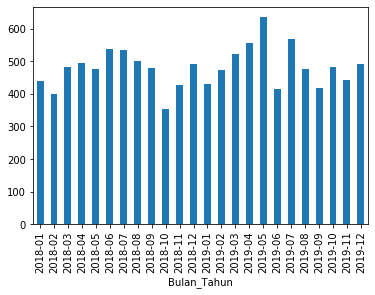

In [34]:


by_num = sewa_fokus.groupby(['Nomor','Bulan_Tahun']).agg({'Harga':'sum',
                                                       'Durasi_(hari)':'mean',
                                                       'Sewa_per_hari':'sum',
                                                       'Tahun':'mean'}).reset_index()


by_num.groupby("Bulan_Tahun")['Nomor'].count().plot(kind='bar');


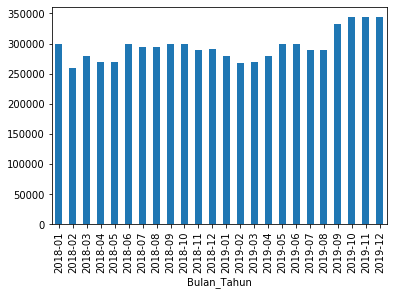

In [35]:
by_num.groupby("Bulan_Tahun")['Harga'].median().plot(kind='bar');

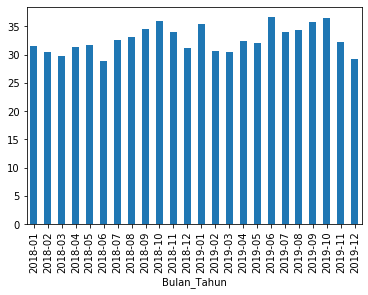

In [36]:
by_num.groupby("Bulan_Tahun")['Durasi_(hari)'].mean().plot(kind='bar');

In [37]:
by_num.groupby("Tahun")['Durasi_(hari)'].mean()

Tahun
2018.0    31.961425
2019.0    33.158952
Name: Durasi_(hari), dtype: float64

### Berdasarkan barang disewa

In [38]:
sewa_fokus.loc[sewa_fokus.Tahun==2018]['Item_Category'].value_counts(normalize=True)[:10]

Activity    0.203649
Stroller    0.140463
Other       0.134381
Crib        0.090329
Mover       0.083210
Playmat     0.073124
Rocker      0.072382
Car_Seat    0.060220
Toy         0.059033
Carrier     0.058588
Name: Item_Category, dtype: float64

In [39]:
sewa_fokus.loc[sewa_fokus.Tahun==2019]['Item_Category'].value_counts(normalize=True)[:10]

Activity    0.195545
Other       0.146768
Stroller    0.137595
Crib        0.093623
Playmat     0.091584
Mover       0.076587
Car_Seat    0.073238
Rocker      0.069307
Toy         0.046447
Carrier     0.045865
Name: Item_Category, dtype: float64

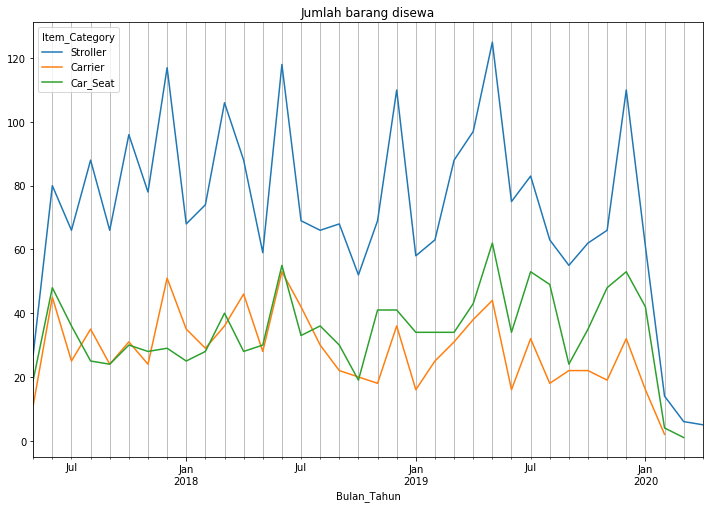

In [108]:
sewa_crosstab_bt = pd.crosstab(sewa.Bulan_Tahun, sewa.Item_Category, values=sewa.Harga, aggfunc='count')[:-3]

# list_bulan_tahun = list(sewa_crosstab_bt['Bulan_Tahun'].astype('str'))

ax = sewa_crosstab_bt[['Stroller','Carrier','Car_Seat']].plot(figsize=(12,8))
ax.grid(which='both',axis='x')
plt.title('Jumlah barang disewa')
plt.savefig('Item_number_bulan_tahun_strollercarriercarseat.jpg')

plt.show();

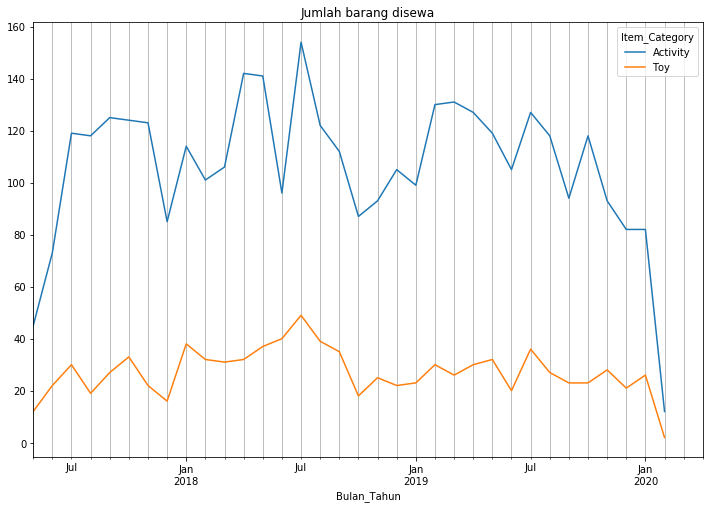

In [110]:
ax = sewa_crosstab_bt[['Activity', 'Toy']].plot(figsize=(12,8))
ax.grid(which='both',axis='x')
plt.title('Jumlah barang disewa')
plt.savefig('Item_number_bulan_tahun_strollercarriercarseat.jpg')

plt.show();

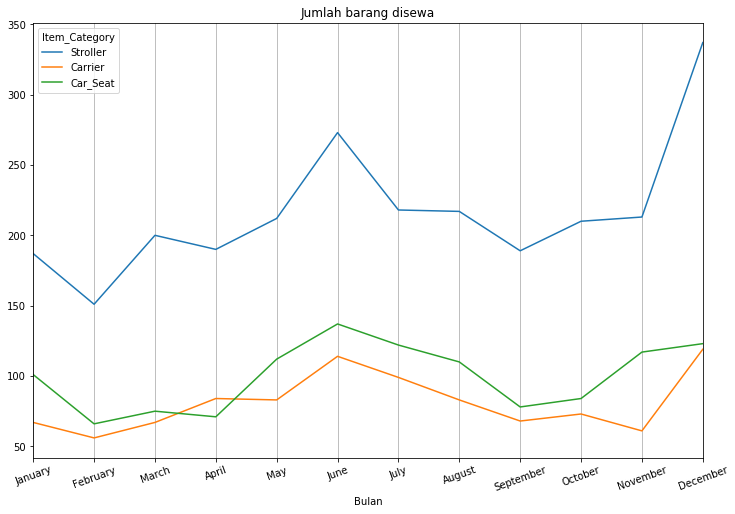

In [74]:
import calendar 

sewa_crosstab_b = pd.crosstab(sewa.Bulan, sewa.Item_Category, values=sewa.Harga, aggfunc='count')
# sewa_crosstab

ax = sewa_crosstab_b[['Stroller','Carrier','Car_Seat']].plot(figsize=(12,8))
ax.grid(which='both',axis='x')
plt.xticks(np.arange(1,13), calendar.month_name[1:13], rotation=20)
plt.title('Jumlah barang disewa');

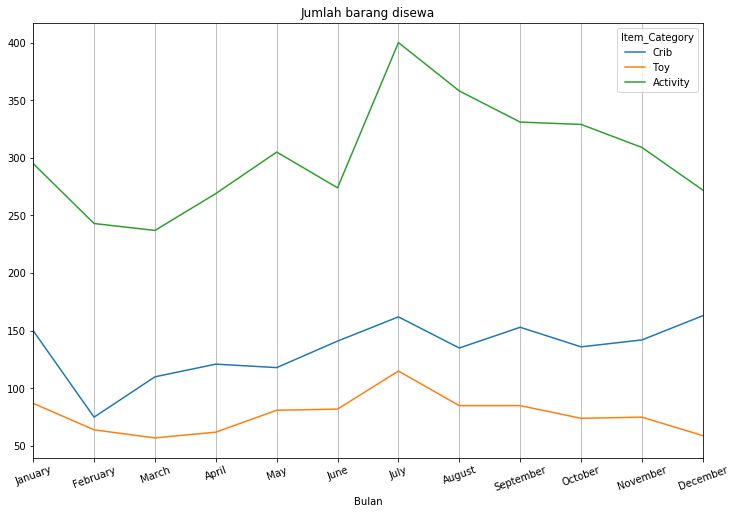

In [75]:
ax = sewa_crosstab_b[['Crib','Toy','Activity']].plot(figsize=(12,8))
ax.grid(which='both',axis='x')
plt.xticks(np.arange(1,13), calendar.month_name[1:13], rotation=20)
plt.title('Jumlah barang disewa');


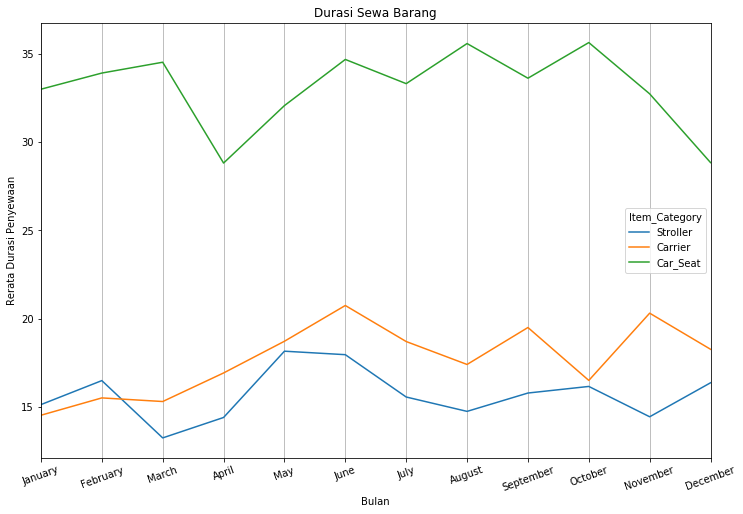

In [85]:
sewa_crosstab_b_durasi = pd.crosstab(sewa.Bulan, sewa.Item_Category, values=sewa['Durasi_(hari)'], aggfunc='mean')

ax = sewa_crosstab_b_durasi[['Stroller','Carrier','Car_Seat']].plot(figsize=(12,8))
ax.grid(which='both',axis='x')
plt.xticks(np.arange(1,13), calendar.month_name[1:13], rotation=20)
plt.ylabel('Rerata Durasi Penyewaan')
plt.title('Durasi Sewa Barang');

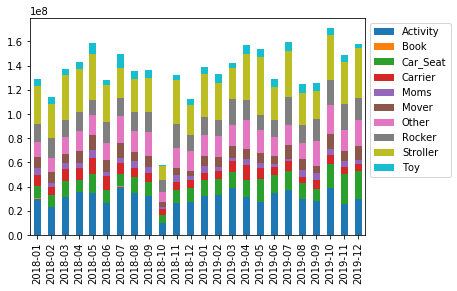

In [183]:
ax = sewa_crosstab.plot(kind='bar',stacked=True)
ax.set_xticklabels(list_bulan_tahun)
plt.legend(bbox_to_anchor=(1,1));

## Strollers

In [90]:
sewa_stroller = sewa_fokus.loc[(data.Item_Category == 'Stroller') & (data['Durasi_(hari)']>0)]

In [91]:
sewa_stroller.Tahun.value_counts()

2018.0    947
2019.0    945
Name: Tahun, dtype: int64

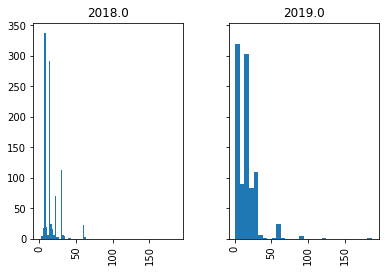

In [92]:
sewa_stroller.hist(column='Durasi_(hari)', by='Tahun', bins=30, sharex=True, sharey=True);

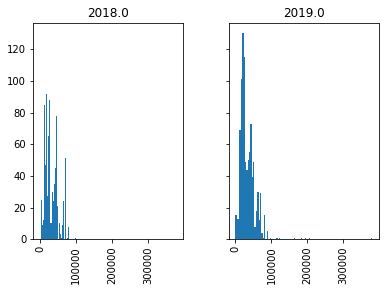

In [93]:
sewa_stroller.hist(column='Sewa_per_hari', by='Tahun', bins=100, sharex=True, sharey=True);

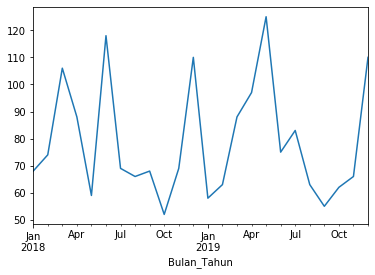

In [100]:
sewa_stroller.groupby("Bulan_Tahun")['Nomor'].count().plot();


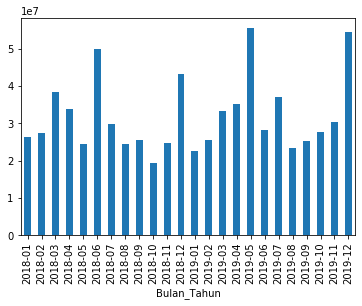

In [98]:
sewa_stroller.groupby("Bulan_Tahun")['Harga'].sum().plot(kind='bar');

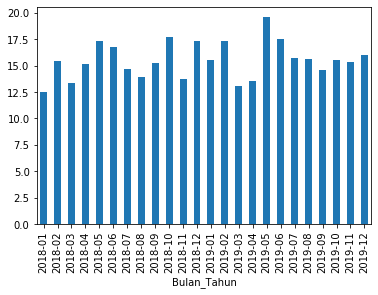

In [111]:
sewa_stroller.groupby("Bulan_Tahun")['Durasi_(hari)'].mean().plot(kind='bar');

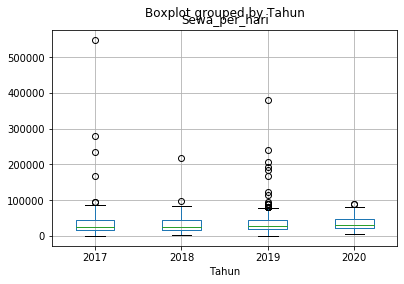

In [269]:
sewa_stroller.boxplot(column='Sewa_per_hari', by='Tahun');

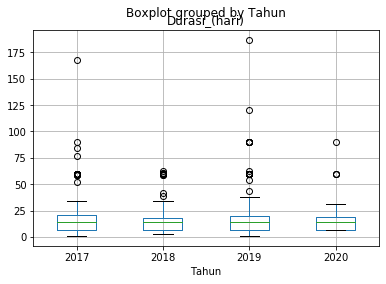

In [268]:
sewa_stroller.boxplot(column='Durasi_(hari)', by='Tahun');

In [112]:
sewa_stroller.groupby('Tahun').median()

,Harga,Durasi_(hari),Sewa_per_hari,Bulan
Tahun,,,,
2018.0,339000.0,14.0,25571.428571,6.0
2019.0,369000.0,14.0,27785.714286,6.0


In [196]:
sewa_stroller.loc[sewa_stroller.Tahun==2019]['Sewa_Item'].value_counts(normalize=True)[:10]

Babyzen - Yoyo+ 6+          0.149425
Keenz - Air Plus            0.109718
Cocolatte - Pockit CL788    0.087774
Cocolatte - Pockit 2        0.085684
Einhill - Armadillo 2       0.077325
Babyzen - Yoyo 6+           0.051202
Joie - Evalite Duo          0.049112
Babyzen - Yoyo+ 0+          0.042842
Baby Jogger - City Tour     0.040752
Nuna - Mixx                 0.026123
Name: Sewa_Item, dtype: float64

In [197]:
sewa_stroller.loc[sewa_stroller.Tahun==2018]['Sewa_Item'].value_counts(normalize=True)[:10]

Babyzen - Yoyo+ 6+                  0.130577
Cocolatte - Pockit CL788            0.121872
Cocolatte - Pockit 2                0.083787
Einhill - Armadillo 2               0.071817
Joie - Evalite Duo                  0.050054
Babyzen - Yoyo 6+                   0.046790
Babystyle - Hybrid Cabi Stroller    0.039173
Babyzen - Yoyo+ 0+                  0.038085
Baby Jogger - City Tour             0.033732
Nuna - Mixx                         0.021763
Name: Sewa_Item, dtype: float64